# Midterm Intro2ML Fall 2023
We will not rerun the code, so outputs and explanations should be clear. Please use MARKDOWN cells to explain, or add comments in code. LONG PAPER, each subquestion is in sequence, you cant solve (b) without solving (a). Expected output is in bold.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Q1 My favourite question
A city is layed out in cartesian coordinates, with house $i$ at location $(x_i, y_i)$.  $x_i\geq0 \in R$ is the distance along the Xaxis and $y_i\geq0 \in R$ is the distance along the Yaxis. Origin is at (0,0).  $(x_i,y_i)$ are uniformly distributed, with only one house at one location. For ease lets assume that the $x_i\leq1$ and $y_i\leq1$

### (a) 5Pts

The prediction variable, price $p_i$, has a linear relationship with euclidean  distance (from the origin) of the house. That is 

$$
p_i = k* \sqrt{({x_i}^2+{y_i}^2)}
$$

Further $k>0$ and and the minimum price is $p > k/100$. You can chose $k$ and $p$. 

Generate 1000 points $(x_i, y_i, p_i)$ such that above relationship and constraints holds.  

**Specify $k$ and $p$  here and not change them for the rest of the questions.**

**Use `plt.scatter (X,Y,c = P, cmap= 'Set1')` to plot generated data points. X,Y,P are the vectors of location and predictor variable.**


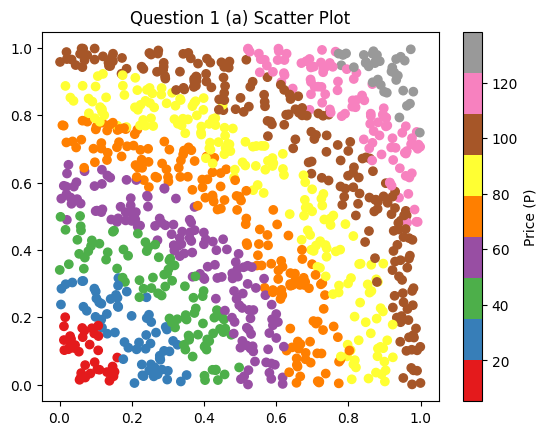

In [53]:
k, p = 100, 1

np.random.seed(0)
x = np.random.rand(1000)
y = np.random.rand(1000)
prices = k * np.sqrt(x**2 + y**2) + np.random.normal(0, 1, 1000)

plt.scatter(x, y, c=prices, cmap='Set1')
plt.title('Question 1 (a) Scatter Plot')
plt.colorbar(label='Price (P)')
plt.show()

### (b) 10 pts

Introduce random error in measuing the price of each house. Model this error  so as to be able to use linear regression (OLS) in the questions below. 

**Explain this model, that is what is the distribution of the random error, what is its mean, what is its standard_deviation? Mathematically how is price affected by error? Plot this histogram of the error.**

NOTE --- It is important to generate noise such that it does not overwhelm the signal (price) but its also important that there is noise. Towards that it may be useful that SNR (standard deviation of signal/standard deviation of noise) is between say 2 and 3, that is signal is atleast twice as strong as noise and less than thrice as strong as noise.

Generate  data with the relationship in (a) and the noise model you propose. If you can ensure that the minimum price is $\geq p$ that will be great, but in any case ensure that the minimum price $>0$ and close to $p$. Report the minimum price. 

**Plot the data using the scatter plot from previous question.** 

> We can model the error as a random variable with mean = 0 and a specific std deviation. The model works under the assumption that the errors are distributed around 0 and have mean = 0. Price with error (Mathematically) = $P_i$ + error

Mean of errors: -0.004448659472935225
Standard deviation of errors: 0.09812806474091448


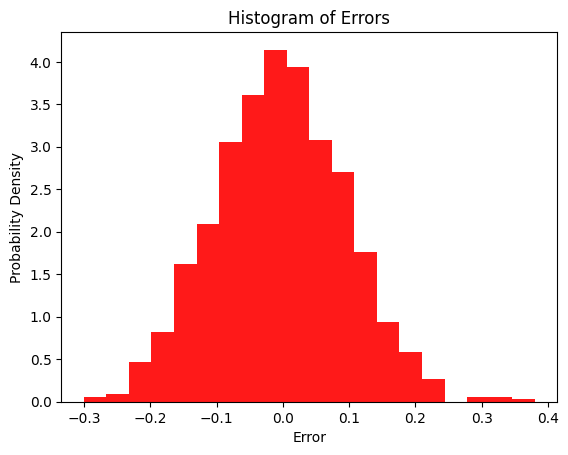

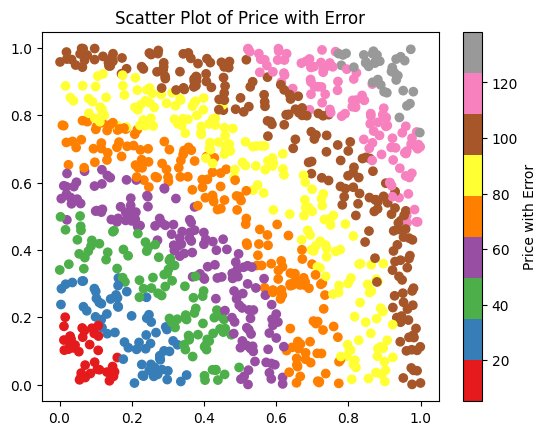

Minimum price with error: 5.794142055563883


In [54]:
error_std = 0.1
errors = np.random.normal(0, error_std, 1000) # generate 1000 errors

print(f"Mean of errors: {np.mean(errors)}")
print(f"Standard deviation of errors: {np.std(errors)}")

prices += errors # introduce errors

# Ensure the minimum price is greater than 0
min_price = min(price_with_error) 
if min_price <= 0:
    prices = prices + (1 - min_price)

plt.hist(errors, bins=20, density=True, alpha=0.9, color='r', label='Error')
plt.xlabel('Error')
plt.ylabel('Probability Density')
plt.title('Histogram of Errors')
plt.show()

plt.scatter(x, y, c=prices, cmap='Set1')
plt.title('Scatter Plot of Price with Error')
plt.colorbar(label='Price with Error')
plt.show()

# Report the minimum price
print(f"Minimum price with error: {min_price}")


### (c) 10 pts
In our dataset each house has a location $(x_i, y_i)$, and a price $p_i$. We want to use OLS Linear regression to estimate slope and intercept  from the data generated in (b).

**Explain the input features you will use for linear regression, the number of features ($m$), and the relationship between the features and $(x,y)$? If $m<2$ please specify the projection that you have used to go to a lower dimensional space.** 


Lets call these feature (vectors) $F1, F2$ (if $m<2$ then $F2=0$). **Code to get features from X, Y and plot P against the feature vectors.**

Also store your dataset
```
data_b = np.c_[P.T, F1.T, F2.T]
```
Check that `data_b.shape == (1000,3)`

In [55]:
F1 = x
F2 = y

data_b = np.c_[P, F1, F2]

print(f"data_b.shape == {data_b.shape}")


data_b.shape == (1000, 3)


### (d) 10 pts
Use ONLY numpy and Psuedo Inverse method to solve OLS Linear Regression for `data_b`. $P$ is the predictor variable vector and $F1$ and $F2$ are the input features. **Code for  Psuedo Inverese method along with code comments.
Report the estimated slope and intercept.**  

In [58]:
X = data_b[:, 1:]  # Features (F1 and F2)
y = data_b[:, 0]   # Predictor

X = np.column_stack((np.ones(X.shape[0]), X)) # column of ones for intercept

X_pseudo_inv = np.linalg.pinv(X)
coefficients = np.dot(X_pseudo_inv, y)

intercept, slope_F1, slope_F2 = coefficients
print("Intercept:", intercept)
print("Slope (F1):", slope_F1)
print("Slope (F2):", slope_F2)

Intercept: 8.53101918344717
Slope (F1): 67.80082824787677
Slope (F2): 68.50620811713546


### (e) 5 pts
**What is the correlation between $P$ and each of the features you have used above? Use the feature that has higher correlation to plot price vs feature data points and  the fitted line from (d).** 

0.678633659161888 0.7050920134872862
Correlation between P and F1: 0.678633659161888
Correlation between P and F2: 0.7050920134872862
Feature with higher correlation: F2


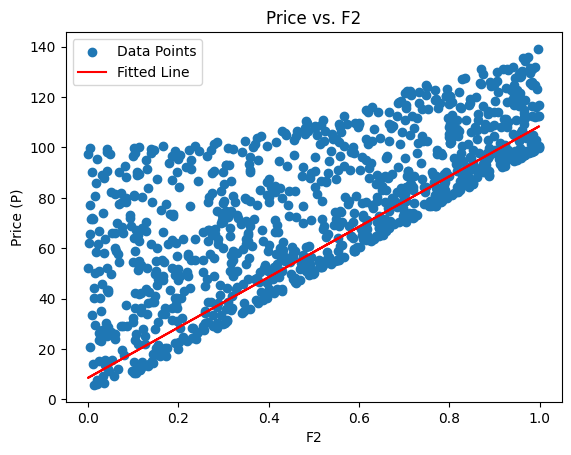

In [59]:
feature_name = ""
correlation_F1 = np.corrcoef(P, F1)[0, 1]
correlation_F2 = np.corrcoef(P, F2)[0, 1]

if abs(correlation_F1) > abs(correlation_F2):
    feature_name = "F1"
    feature = F1
else:
    feature_name = "F2"
    feature = F2

print(f"Correlation between P and F1: {correlation_F1}")
print(f"Correlation between P and F2: {correlation_F2}")
print(f"Feature with higher correlation: {feature_name}")

plt.scatter(feature, P, label='Data Points')
plt.xlabel(feature_name)
plt.ylabel('Price (P)')
plt.title(f'Price vs. {feature_name}')
plt.legend()

# Plot the fitted line from part (d)
fitted_line = slope * feature + intercept
plt.plot(feature, fitted_line, color='red', label='Fitted Line')
plt.legend()

plt.show()


### (f) 5Pts
Assume that there is a landfill site at location $(1/2, 1/2)$. Wind blows in a arc (centerd at origin) +/- 15 degress around this location. This has foul smell, so the price of houses in this cone 
$$
p_i = k/2* \sqrt{({x_i}^2+{y_i}^2)}
$$

Outside the cone the price is still
$$
p_i = k* \sqrt{({x_i}^2+{y_i}^2)}
$$

Generate data $(x_i, y_i, p_i)$ with these relationships.  Also add random noise like (b) above. And also ensure minimum price is close to $p$. Report the minimum price obtained

Also use the same features that you defined in (b) and store your dataset
```
data_f = np.c_[P.T, F1.T, F2.T]
```

For your validation you should plot features against predictor variables, get correlation coeffs etc to ensure that the dataset is correct. 
**Plot the point using scatter plot in (a)**

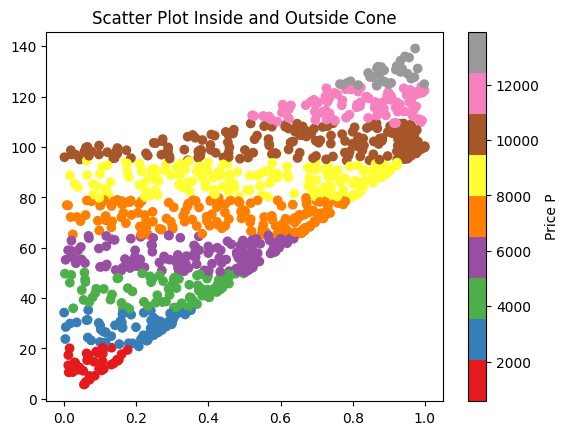

In [66]:
cone_theta = np.deg2rad(15)
inside_cone = k//2 * np.sqrt(x**2 + y**2) + np.random.normal(0, 1, 1000)
outside_cone = k * np.sqrt(x**2 + y**2) + np.random.normal(0, 1, 1000)

p = np.where(np.arctan2(y, x) <= cone_theta, inside_cone, outside_cone)

plt.scatter(x, y, c=p, cmap='Set1')
plt.colorbar(label='Price P')
plt.title('Scatter Plot Inside and Outside Cone')
plt.show()

data_f = np.c_[p.T, F1.T, F2.T]

### (g) 10 pts
**Report the correlation between $P$ and the features for data generated in (f). Plot price vs F1 and F2 as two different plots (in same figure, using different colors). How has the correlation changed from (e) above? Explain.**

Correlation with F1 in data_f: 0.6786551307641812
Correlation with F2 in data_f: 0.7050649281176607


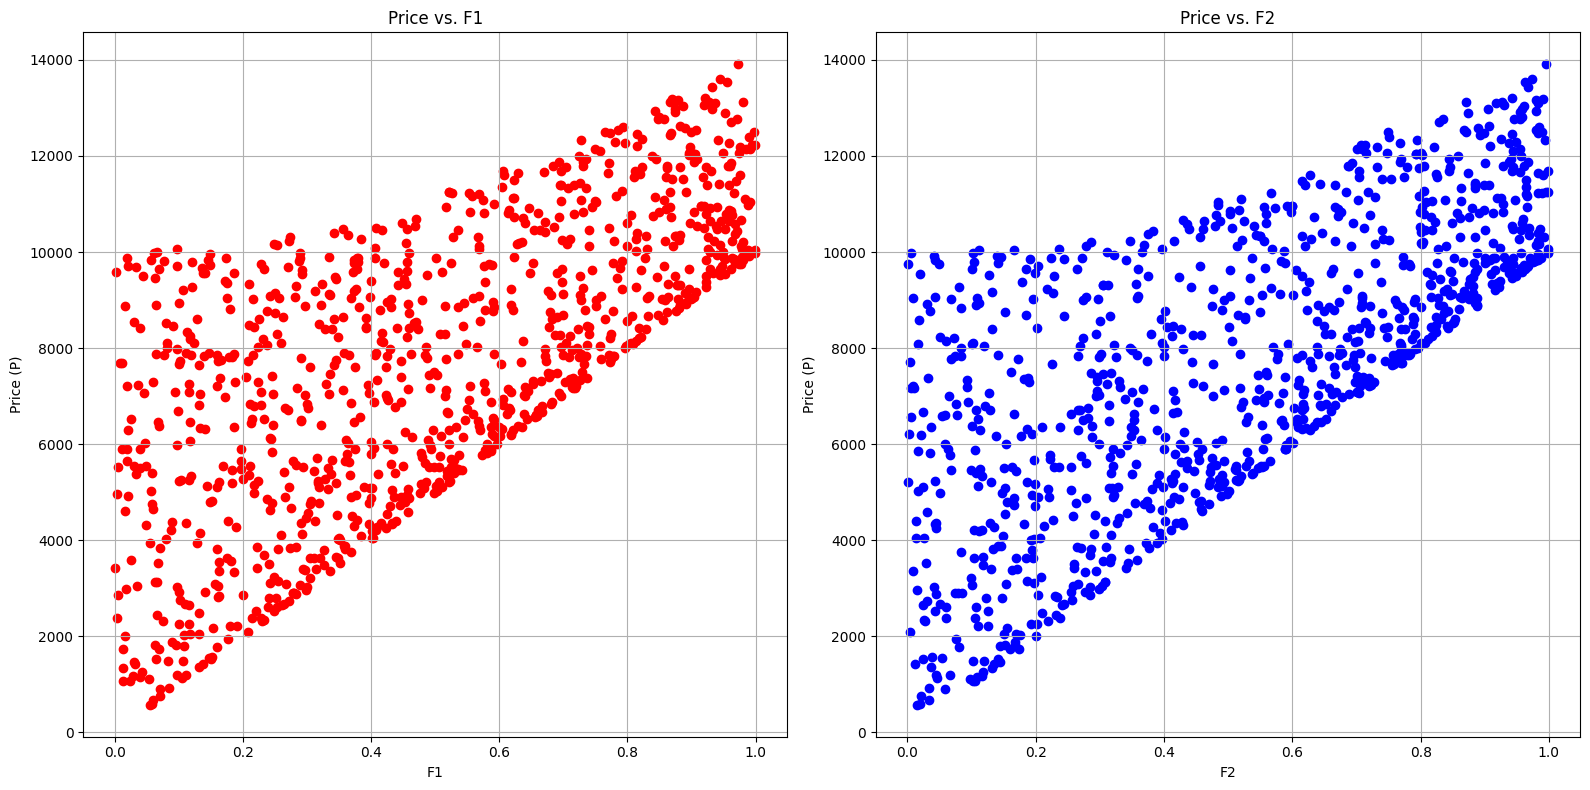

In [74]:
correlation_F1_f = np.corrcoef(data_f[:, 1], data_f[:, 0])[0, 1]
correlation_F2_f = np.corrcoef(data_f[:, 2], data_f[:, 0])[0, 1]

print("Correlation with F1 in data_f:", correlation_F1_f)
print("Correlation with F2 in data_f:", correlation_F2_f)


plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(data_f[:, 1], data_f[:, 0], c='r')
plt.xlabel('F1')
plt.ylabel('Price (P)')
plt.title('Price vs. F1')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(data_f[:, 2], data_f[:, 0], c='b')
plt.xlabel('F2')
plt.ylabel('Price (P)')
plt.title('Price vs. F2')
plt.grid()

plt.tight_layout()
plt.show()

### (h) 10 pts
Use PCA to project `data_b` and `data_f` onto a plane and onto a  line.  You can use `sklearn.decomposition.PCA` to do the PCA. The input to PCA is the dataset and output is the projected components. **Explain the output wrt to the input. Explanations should use plots, concept of correlation, and/or concept of independence. If price and a feature have low correlations, are they also independent? Prove using your data.**




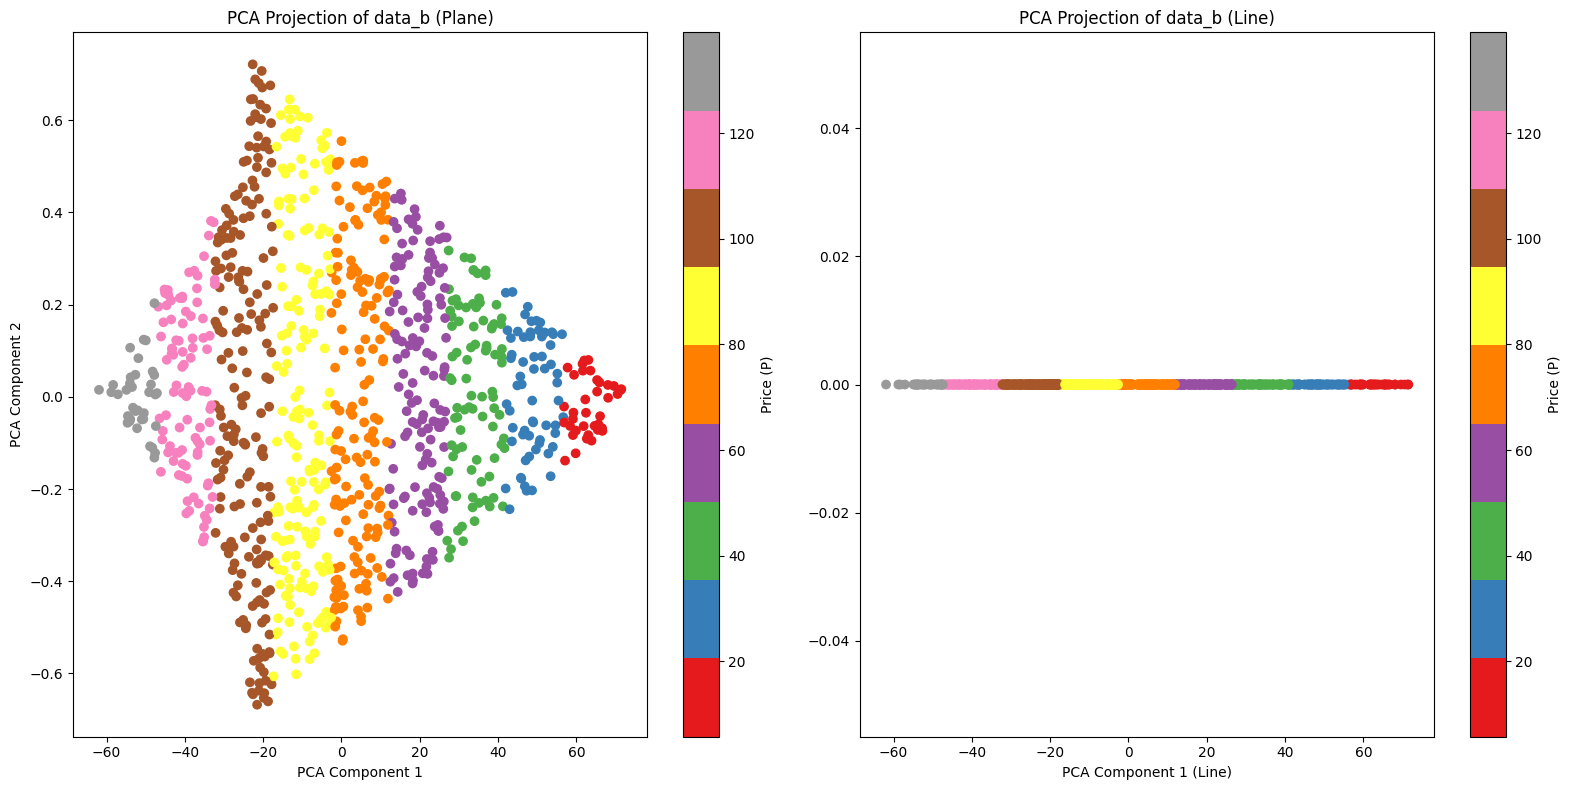

In [78]:
from sklearn.decomposition import PCA

pca_b = PCA(n_components=3)
pca_b.fit(data_b)

data_b_plane = pca_b.transform(data_b)[:, :2]
data_b_line = pca_b.transform(data_b)[:, :1]


plt.figure(figsize=(16, 8))

#PCA data_b on Plane
plt.subplot(1, 2, 1)
plt.scatter(data_b_plane[:, 0], data_b_plane[:, 1], c=data_b[:, 0], cmap='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection of data_b (Plane)')
plt.colorbar(label='Price (P)')

# PCA data_b on line
plt.subplot(1, 2, 2)
plt.scatter(data_b_line, np.zeros(data_b_line.shape), c=data_b[:, 0], cmap='Set1')
plt.xlabel('PCA Component 1 (Line)')
plt.title('PCA Projection of data_b (Line)')
plt.colorbar(label='Price (P)')

plt.tight_layout()
plt.show()

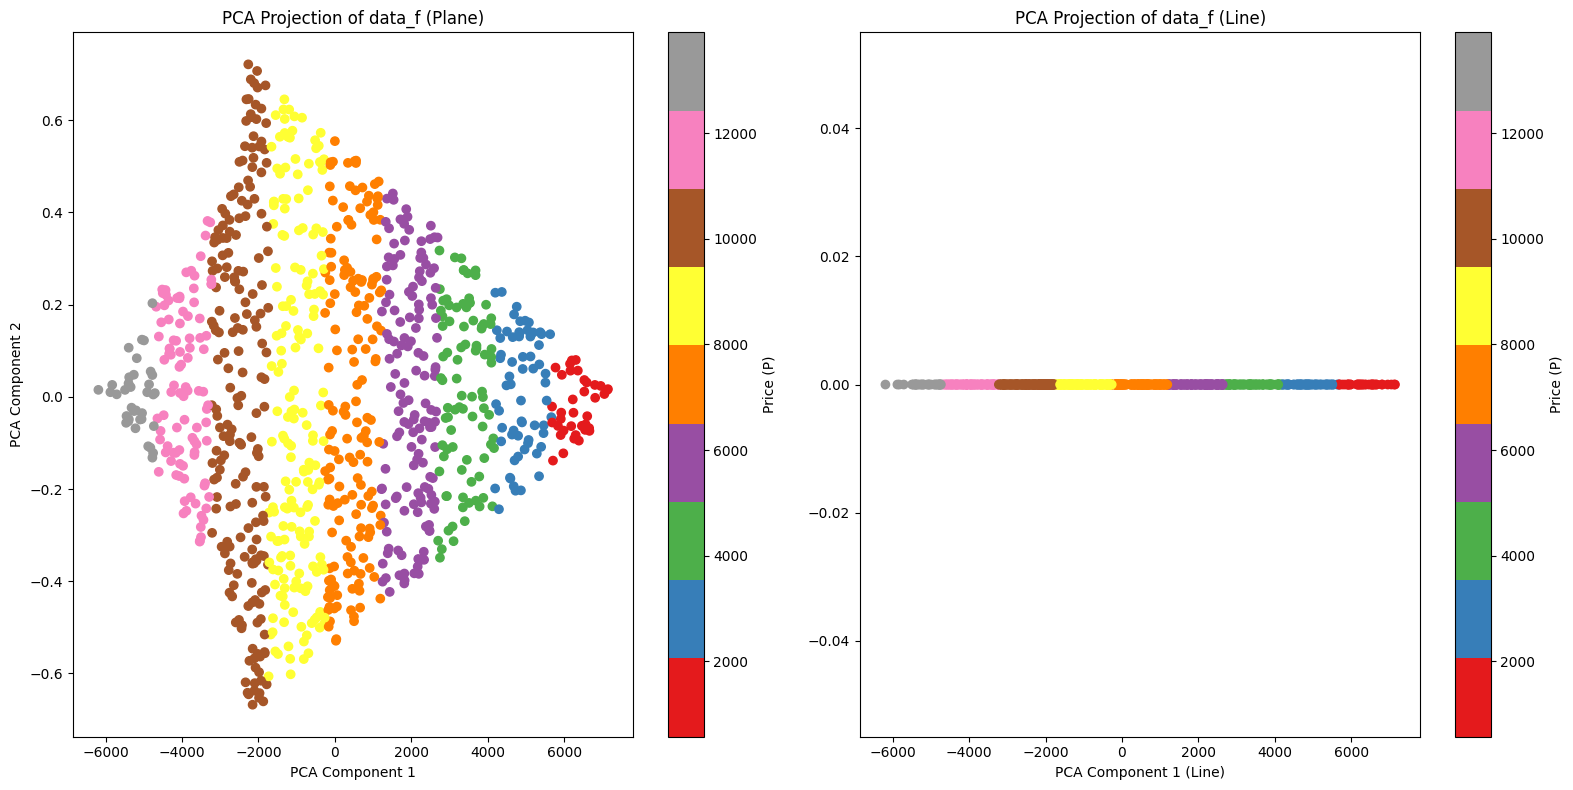

In [79]:
pca_f = PCA(n_components=3)
pca_f.fit(data_f)

data_f_plane = pca_f.transform(data_f)[:, :2]
data_f_line = pca_f.transform(data_f)[:, :1]


plt.figure(figsize=(16, 8))

#PCA data_f on Plane
plt.subplot(1, 2, 1)
plt.scatter(data_f_plane[:, 0], data_f_plane[:, 1], c=data_f[:, 0], cmap='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection of data_f (Plane)')
plt.colorbar(label='Price (P)')

#PCA data_f on a line
plt.subplot(1, 2, 2)
plt.scatter(data_f_line, np.zeros(data_f_line.shape), c=data_f[:, 0], cmap='Set1')
plt.xlabel('PCA Component 1 (Line)')
plt.title('PCA Projection of data_f (Line)')
plt.colorbar(label='Price (P)')

plt.tight_layout()
plt.show()

## Q2
Stochastic Gradient Descent



### (a) 10pts
Let $ \hat{y} = \sigma(\theta_0+\theta_1 x)$

where $\sigma$ is the sigmod function, $x\in R^1$ and $y in $R^1$.

Let there be $m$ data samples $(x_i,y_i)$ and MSE cost function 
$$
J(\theta) = 0.5*\sum_{i=1}^m (\hat{y_i} -y_i)^2
$$

**Code Stochastic Gradient Descent, with a learning rate $\alpha$. You should explain the code with comments. Code is important in this case.**


In [90]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def stochastic_gradient_descent(X, y, theta, alpha, epochs):
    m = len(y) 

    for each in range(epochs):
        for i in range(m):

            random_index = np.random.randint(0, m)
            xi = X[random_index]
            yi = y[random_index]

            # calculate using the current parameters
            z = theta[0] + theta[1] * xi
            y_hat = sigmoid(z)

            g1, g2 = y_hat - yi, (y_hat - yi) * xi
            
            theta[0] -= alpha * g1
            theta[1] -= alpha * g2

        print(f'Iteration = {each + 1} & Thetas = {theta[0:2]}')

    return theta

### (b) 10 pts
Generate some datastet $(Y,X)$, if we are trying to do a ML problem, Y should be correlated with X, with perhaps some noise. 

Initialize $\theta_0$ and $\theta_1$, and/or modify $X$ such that in more than S steps and less than 2*S $S>5$ steps, sigmoid  gets saturated, and there are no SGD updates. Use learning_rate of 0.01 or lower.

**Print the updated $\theta_{[0,1]}$ with each update and show that they dont change after saturation**


> Setting iterations between 5 and 10, the sigmoid function will get saturated, and we observe that the parameters theta stop changing after saturation.

In [93]:
X = np.array([10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 1, 1])

theta = np.array([0.3, 0.5])  
iterations, learning_rate = 8, 0.001

final_theta = stochastic_gradient_descent(X, y, theta, learning_rate, iterations)

# Print the final theta after optimization
print(f'Final Theta = [{final_theta[0]}, {final_theta[1]}]')

Iteration = 1 & Thetas = [0.29700015 0.43000307]
Iteration = 2 & Thetas = [0.29501247 0.40012756]
Iteration = 3 & Thetas = [0.29006016 0.31061919]
Iteration = 4 & Thetas = [0.288101   0.28104278]
Iteration = 5 & Thetas = [0.28521316 0.24219164]
Iteration = 6 & Thetas = [0.28128232 0.14301557]
Iteration = 7 & Thetas = [0.27853081 0.08653783]
Iteration = 8 & Thetas = [0.27692158 0.0543217 ]
Final Theta = [0.27692158386832705, 0.05432170211133969]


## Q3
Cats and Dogs

### (a) 10 pts
Assume that these animals have two features. 
Use
```
rng = np.random.RandomState(SOMESEED)

cat = rng.multivariate_normal(mean=cat_mean, cov=cat_cov, size=n_samples)
```

```
dog = rng.multivariate_normal(mean=dog_mean, cov=dog_cov, size=n_samples)
```

Note that cat_mean/dog_mean are 2x1 vector, while cat_cov/dog_cov are 2x2 matrices. 

Choose these mean and cov and generate 1000 points for each class. To distinguish these two classes, these parameters should be different for each class. Report these parameters.

**Code a train_test_split function that splits the data into 700 points for training, 300 points for testing for each class. Use ONLY numpy apis. plot your data, use different colors for training data and test data. Put comments on the code**


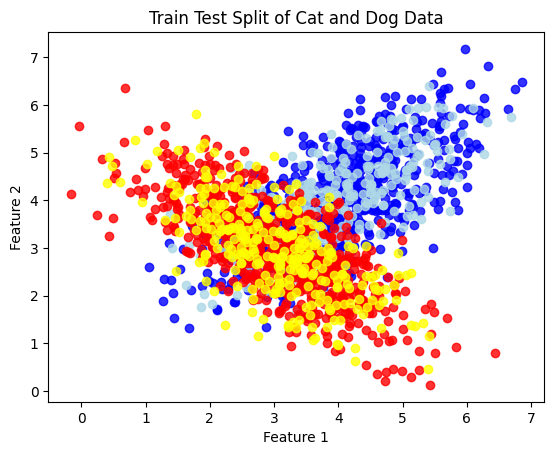

In [104]:
# train-test split function
def train_test_split(X, y, train_size=700):
    X_train = X[:train_size]
    y_train = y[:train_size]
    X_test = X[train_size:]
    y_test = y[train_size:]
    return X_train, y_train, X_test, y_test

N = 1000
cats, dogs = np.array([4,4]), np.array([3,3])
cat_cov = np.array([[1, 0.7], [0.7, 1]])
dog_cov = np.array([[1, -0.7], [-0.7, 1]])


rng = np.random.RandomState(124)
cat_data = rng.multivariate_normal(mean=cats, cov=cat_cov, size=N)
dog_data = rng.multivariate_normal(mean=dogs, cov=dog_cov, size=N)

cat_labels, dog_labels = np.zeros(N), np.zeros(N)

# set up features and predictor classifications
X = np.vstack((cat_data, dog_data))
y = np.concatenate((cat_labels, dog_labels))

# shuffle it up
permutation = np.random.permutation(X.shape[0])
X, y = X[permutation], y[permutation]

X_train_cat, y_train_cat, X_test_cat, y_test_cat = train_test_split(cat_data, cat_labels)
X_train_dog, y_train_dog, X_test_dog, y_test_dog = train_test_split(dog_data, dog_labels)

plt.scatter(X_train_cat[:, 0], X_train_cat[:, 1], c='blue', label='Cat Train', alpha=0.8)
plt.scatter(X_test_cat[:, 0], X_test_cat[:, 1], c='lightblue', label='Cat Test', alpha=0.8)
plt.scatter(X_train_dog[:, 0], X_train_dog[:, 1], c='red', label='Dog Train', alpha=0.8)
plt.scatter(X_test_dog[:, 0], X_test_dog[:, 1], c='yellow', label='Dog Test', alpha=0.8)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Train Test Split of Cat and Dog Data')
plt.show()

### (b) 10 pts
Chose mean and cov such that these points are > 70% linearly seperable and less than 95% seperable.  Use `sklearn.linear_model.LogisticRegression` to run Logistic Regression on the train dataset. **Show that the test accuracy is ~ 70%. In this case it may be best to use diagonal covariance matrices.** 

### (c) 10 pts 
Keep the same mean as above and keep the diagonal elements of cov matrix, add valid non diagonal elements to cov matrix. Generate the data, run Logistic Regression. **Is its test accuracy higher than (b) above? Explain the difference if any.**

### (d) 10 pts
Let the mean for cats and dogs data be exactly the same, while the cov matrices are different. **What are the cov_cat, cov_dog that will get the best classification result using Logistic Regression. Plot the contour plots of these cov matrices.**

## Q4 (10 pts)
ChatGPT, LLM and all the KoolAid 

This question is primarily geared towards folks who want to use ChatGPT etc. As I said in the post if you want to use it, you should be able to explain its working wrt concepts taught in class. For folks who are not familiar with the internals of LLM this question may take some time to answer and may not be worth it.

All LLM models are trained on large text. Text is obviously not an input to a numerical ML algorithm. In class we discussed one hot vector as a numerical encoding for categorical data. However one hot encodings are not used for text -- [0,0,1], [0,1,0], [1,0,0] for say 3 text "tokens" have no semantic meaning, have high entropy, and they are equidistant from each other. In `https://github.com/karpathy/nanoGPT/tree/master/data` there are two methods for numerical encodings of text.  **List the two methods, explain the two methods, and contrast it with one hot vector encoding. This explanation should be more detailed than a simple query on GPT/Bing/BArd etc.**